**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/Netflix Userbase.csv")

In [ ]:
data.head()

User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month

In [ ]:
data.tail()

User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

            Country  Age  Gender    Device Plan Duration  
2495          Spain   28  Female  Smart TV       1 Month  
2496          Spain   33  Female  Smart TV       1 Month  
2497  United States   38    Male    Laptop       1 Month  
2498         Canada   48  Female    Tablet       1 Month  
2499  United States   35  Female  Smart TV       1 Month

**Data Cleaning and preprocessing**

In [ ]:
numeric_columns = ['User ID', 'Age']
categorical_columns = ['Subscription Type', 'Monthly Revenue', 'Join Date',
                       'Last Payment Date', 'Country', 'Gender',
                       'Device', 'Plan Duration']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))

In [ ]:
data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [ ]:
data.describe()

User ID          Age
count  2500.00000  2500.000000
mean   1250.50000    38.795600
std     721.83216     7.171778
min       1.00000    26.000000
25%     625.75000    32.000000
50%    1250.50000    39.000000
75%    1875.25000    45.000000
max    2500.00000    51.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   User ID            2500 non-null   int64   
 1   Subscription Type  2500 non-null   category
 2   Monthly Revenue    2500 non-null   category
 3   Join Date          2500 non-null   category
 4   Last Payment Date  2500 non-null   category
 5   Country            2500 non-null   category
 6   Age                2500 non-null   int64   
 7   Gender             2500 non-null   category
 8   Device             2500 non-null   category
 9   Plan Duration      2500 non-null   category
dtypes: category(8), int64(2)
memory usage: 74.0 KB


In [ ]:
data.describe(include=['category'])

Subscription Type  Monthly Revenue Join Date Last Payment Date Country  \
count               2500             2500      2500              2500    2500   
unique                 3                6       300                26      10   
top                Basic               12  05-11-22          28-06-23   Spain   
freq                 999              455        33               164     451   

        Gender  Device Plan Duration  
count     2500    2500          2500  
unique       2       4             1  
top     Female  Laptop       1 Month  
freq      1257     636          2500

**Data Visualization and Insights**

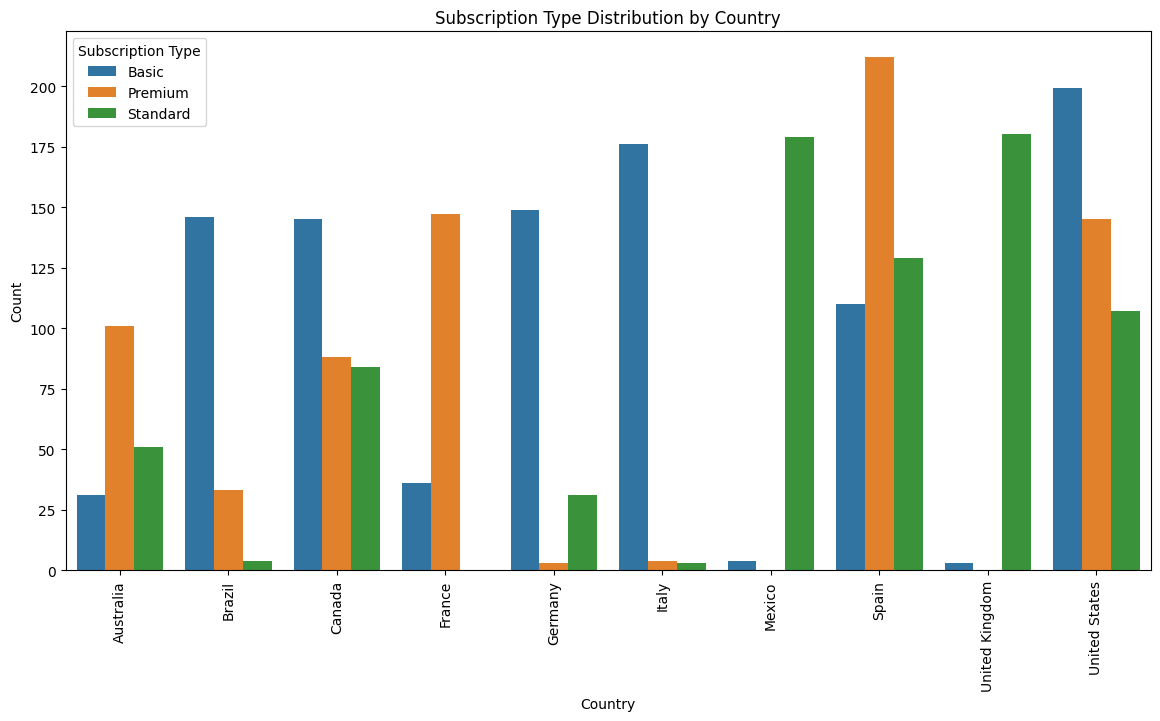

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Country', hue='Subscription Type')
plt.title('Subscription Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Subscription Type')
plt.show()

In [ ]:
data["Plan Duration"]

0       1 Month
1       1 Month
2       1 Month
3       1 Month
4       1 Month
         ...   
2495    1 Month
2496    1 Month
2497    1 Month
2498    1 Month
2499    1 Month
Name: Plan Duration, Length: 2500, dtype: category
Categories (1, object): ['1 Month']

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
data

User ID Subscription Type Monthly Revenue Join Date Last Payment Date  \
0           1             Basic              10  15-01-22          10-06-23   
1           2           Premium              15  05-09-21          22-06-23   
2           3          Standard              12  28-02-23          27-06-23   
3           4          Standard              12  10-07-22          26-06-23   
4           5             Basic              10  01-05-23          28-06-23   
...       ...               ...             ...       ...               ...   
2495     2496           Premium              14  25-07-22          12-07-23   
2496     2497             Basic              15  04-08-22          14-07-23   
2497     2498          Standard              12  09-08-22          15-07-23   
2498     2499          Standard              13  12-08-22          12-07-23   
2499     2500             Basic              15  13-08-22          12-07-23   

             Country  Age  Gender      Device Plan Duration Age Group  
0      United States   28    Male  Smartphone       1 Month     26-35  
1             Canada   35  Female      Tablet       1 Month     26-35  
2     United Kingdom   42    Male    Smart TV       1 Month     36-45  
3          Australia   51  Female      Laptop       1 Month     46-55  
4            Germany   33    Male  Smartphone       1 Month     26-35  
...              ...  ...     ...         ...           ...       ...  
2495           Spain   28  Female    Smart TV       1 Month     26-35  
2496           Spain   33  Female    Smart TV       1 Month     26-35  
2497   United States   38    Male      Laptop       1 Month     36-45  
2498          Canada   48  Female      Tablet       1 Month     46-55  
2499   United States   35  Female    Smart TV       1 Month     26-35  

[2500 rows x 11 columns]

In [ ]:
# prompt: change the plan duration dtype

data['Plan Duration']


0       1 Month
1       1 Month
2       1 Month
3       1 Month
4       1 Month
         ...   
2495    1 Month
2496    1 Month
2497    1 Month
2498    1 Month
2499    1 Month
Name: Plan Duration, Length: 2500, dtype: category
Categories (1, object): ['1 Month']

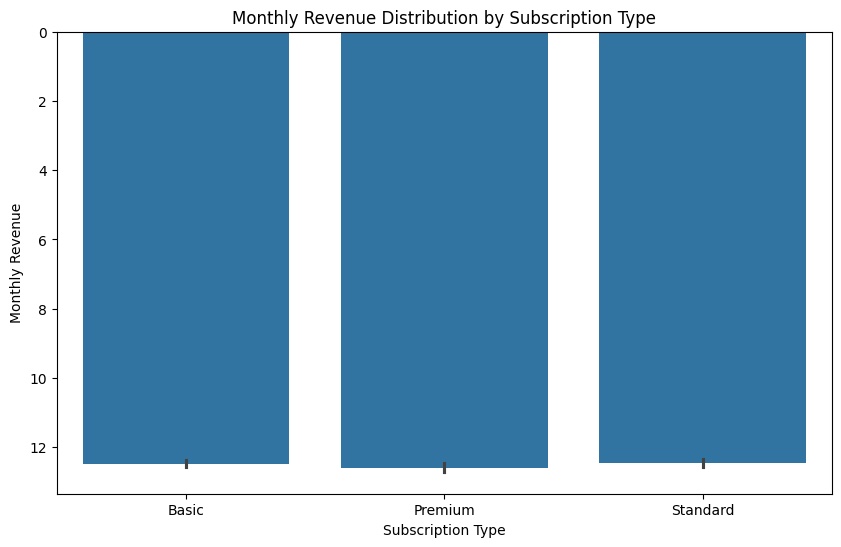

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Subscription Type', y='Monthly Revenue', data=data)
plt.title('Monthly Revenue Distribution by Subscription Type')
plt.show()

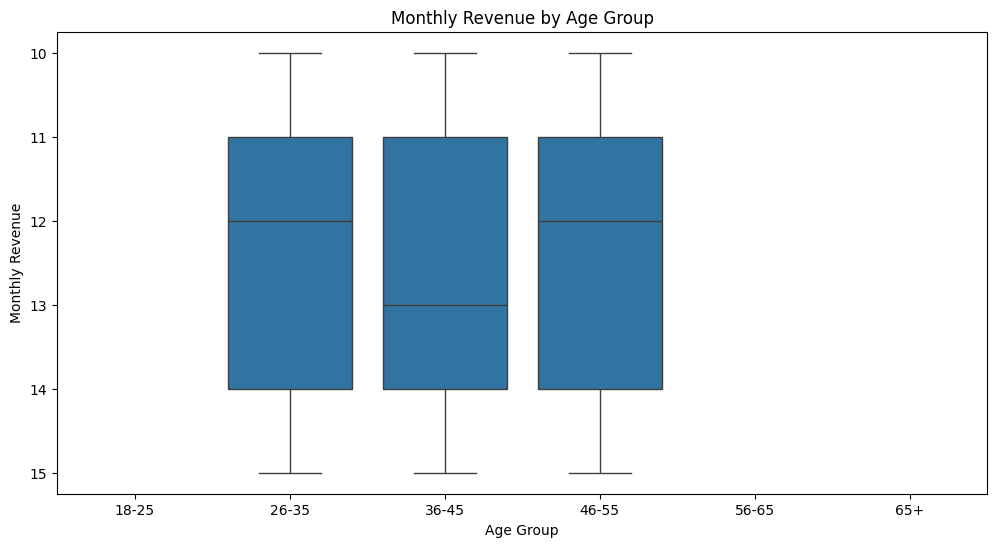

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Monthly Revenue', data=data)
plt.title('Monthly Revenue by Age Group')
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Laptop'),
  Text(1, 0, 'Smart TV'),
  Text(2, 0, 'Smartphone'),
  Text(3, 0, 'Tablet')])

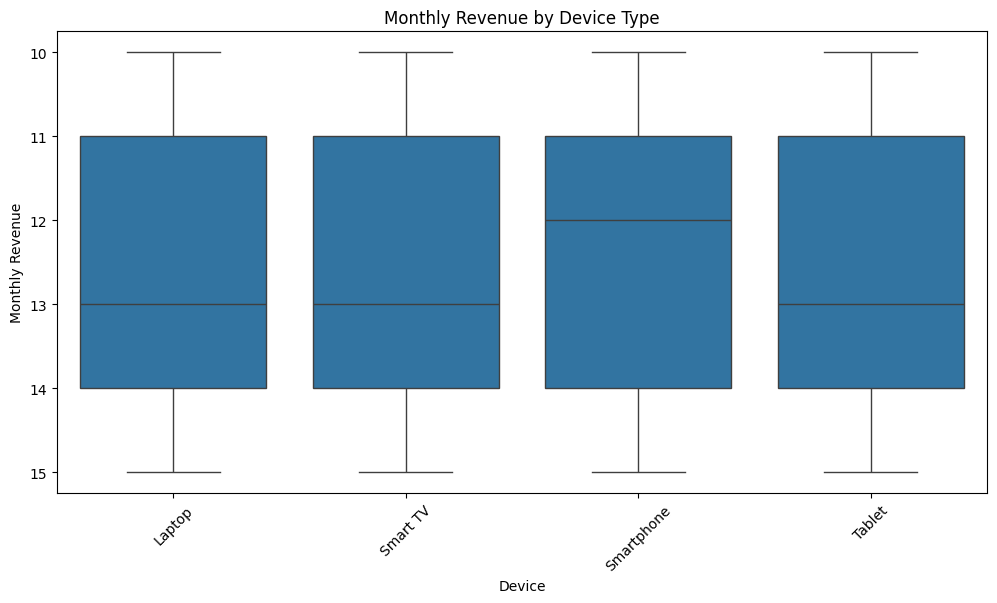

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Device', y='Monthly Revenue', data=data)
plt.title('Monthly Revenue by Device Type')
plt.xticks(rotation=45)

In [ ]:
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Join YearMonth'] = data['Join Date'].dt.to_period('M')
monthly_signups = data['Join YearMonth'].value_counts().sort_index()

(array([624, 636]), [Text(624, 0, 'Jan\n2022'), Text(636, 0, 'Jan\n2023')])

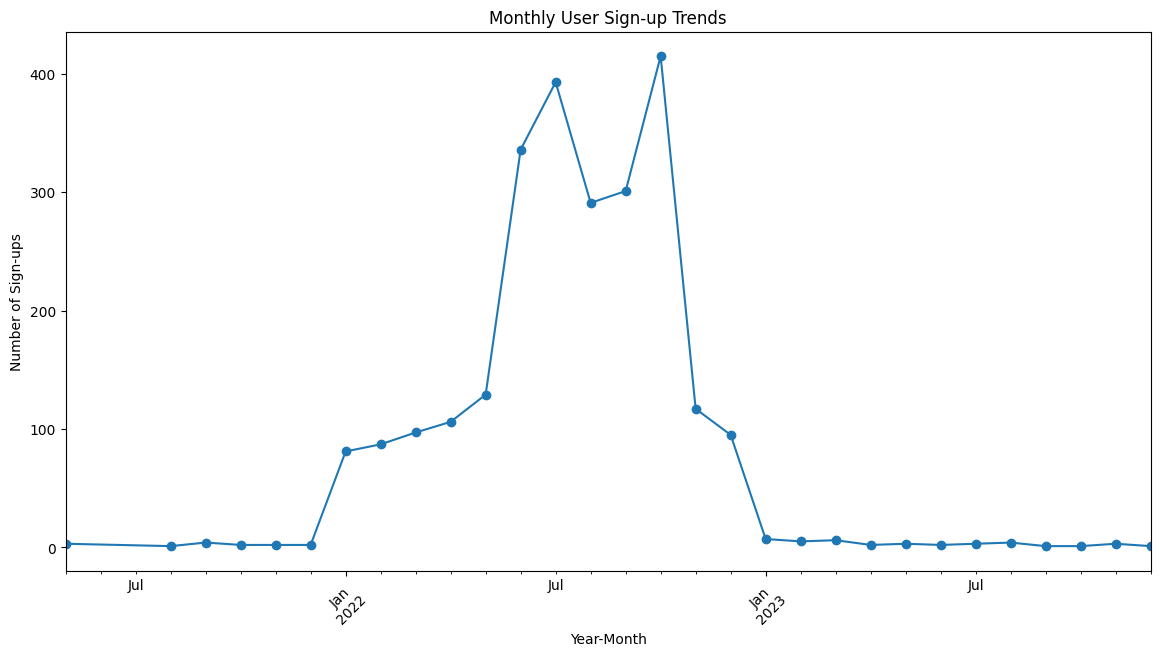

In [ ]:
plt.figure(figsize=(14, 7))
monthly_signups.plot(kind='line', marker='o')
plt.title('Monthly User Sign-up Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

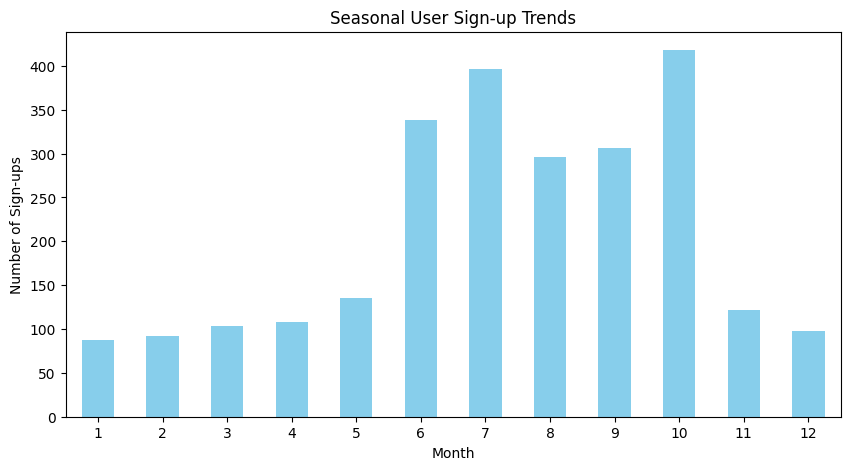

In [ ]:
data['Join Month'] = data['Join Date'].dt.month
seasonal_signups = data['Join Month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
seasonal_signups.plot(kind='bar', color='skyblue')
plt.title('Seasonal User Sign-up Trends')
plt.xlabel('Month')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=0)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'United States')])

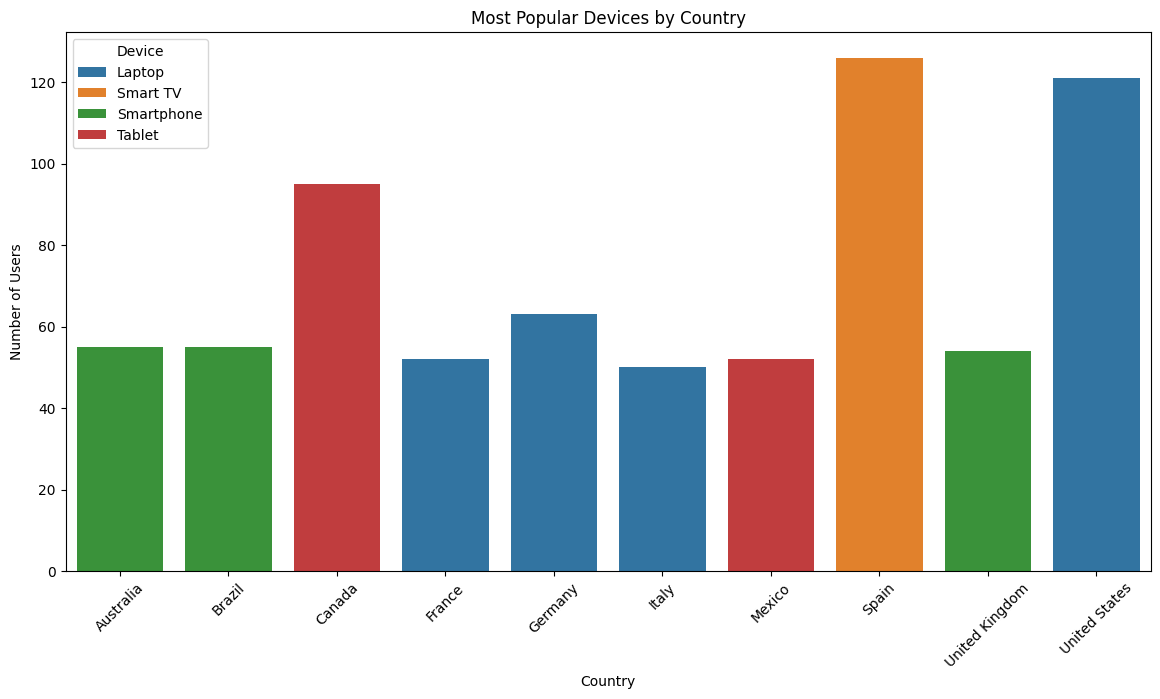

In [ ]:
device_popularity = data.groupby(['Country', 'Device']).size().reset_index(name='Count')
most_popular_devices = device_popularity.loc[device_popularity.groupby('Country')['Count'].idxmax()]
plt.figure(figsize=(14, 7))
sns.barplot(data=most_popular_devices, x='Country', y='Count', hue='Device', dodge=False)
plt.title('Most Popular Devices by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

In [ ]:
data['Monthly Revenue'] = pd.to_numeric(data['Monthly Revenue'], errors='coerce')
data['YearMonth'] = data['Join Date'].dt.to_period('M')
monthly_revenue = data.groupby('YearMonth')['Monthly Revenue'].sum().reset_index()
monthly_revenue['Revenue Growth'] = monthly_revenue['Monthly Revenue'].pct_change() * 100
monthly_revenue.dropna(inplace=True)
monthly_revenue.head()

YearMonth  Monthly Revenue  Revenue Growth
1   2021-08               12      -69.230769
2   2021-09               48      300.000000
3   2021-10               27      -43.750000
4   2021-11               22      -18.518519
5   2021-12               28       27.272727

In [ ]:
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])
data['YearMonth'] = data['Last Payment Date'].dt.to_period('M')
monthly_revenue = data.groupby(['Country', 'YearMonth'])['Monthly Revenue'].sum().reset_index()
revenue_pivot = monthly_revenue.pivot(index='YearMonth', columns='Country', values='Monthly Revenue')

Text(0, 0.5, 'Monthly Revenue')

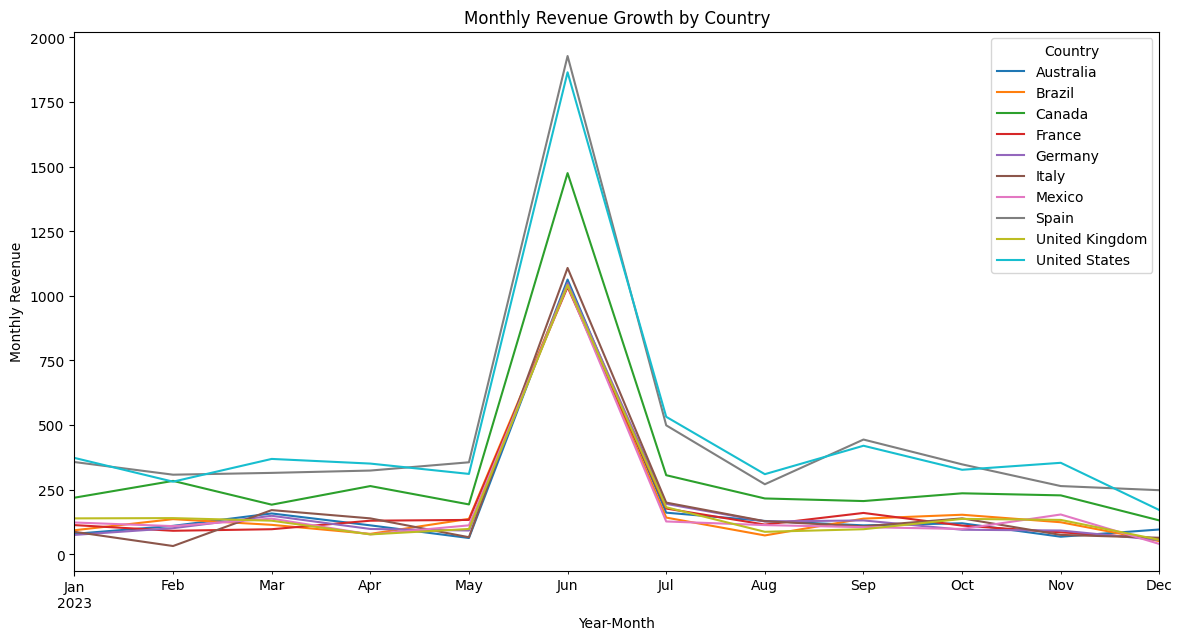

In [ ]:
revenue_pivot.plot(kind='line', figsize=(14, 7))
plt.title('Monthly Revenue Growth by Country')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Revenue')

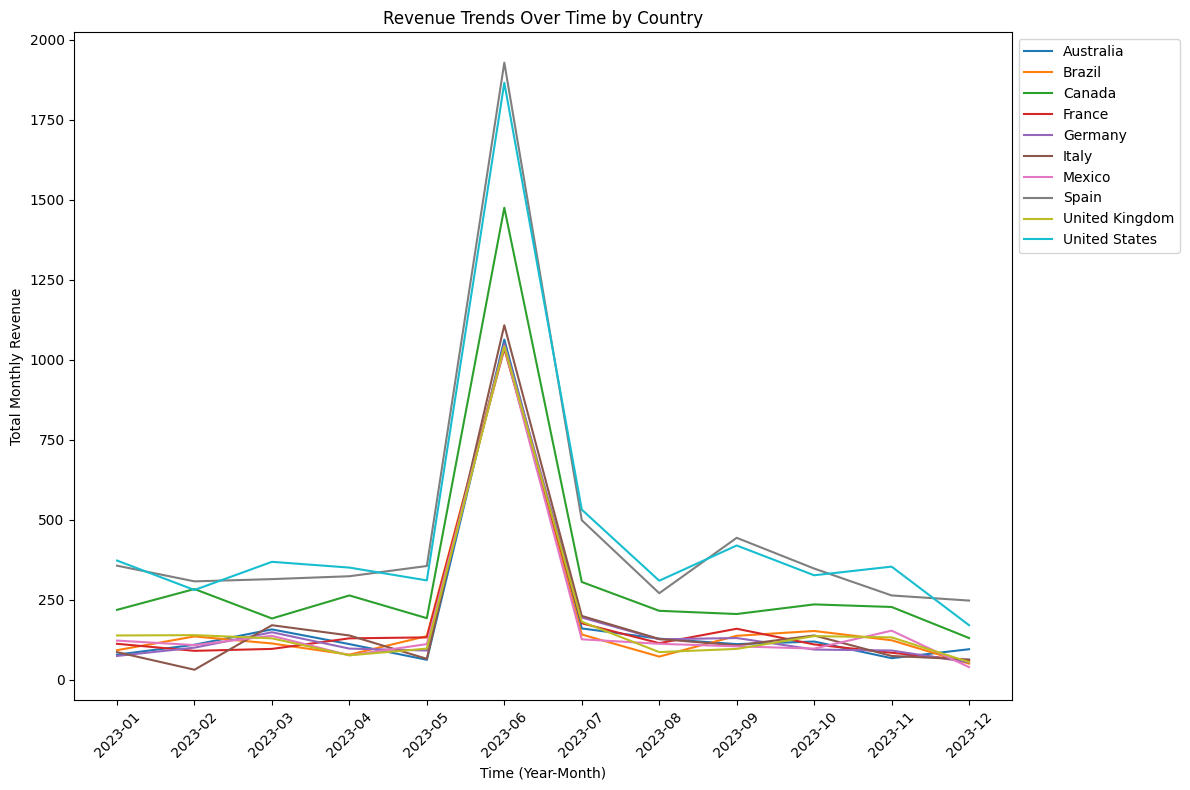

In [ ]:
plt.figure(figsize=(12, 8))
for country in revenue_pivot.columns:
    x_values = [str(period) for period in revenue_pivot.index]
    plt.plot(x_values, revenue_pivot[country], label=country)

plt.title('Revenue Trends Over Time by Country')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Monthly Revenue')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

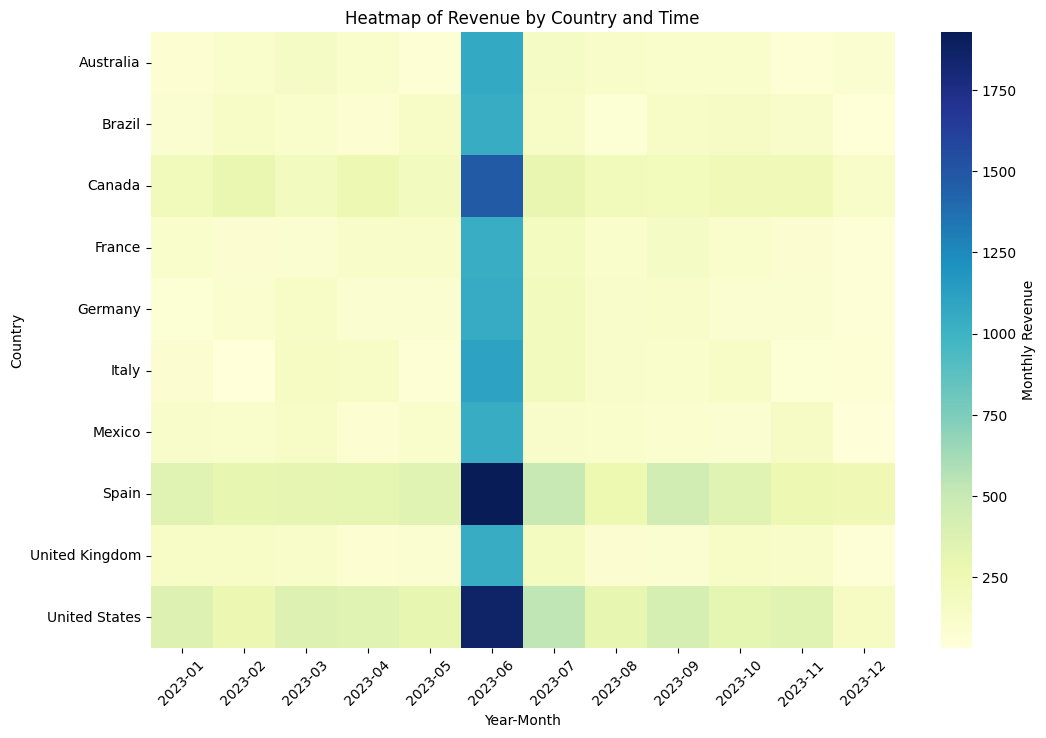

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(revenue_pivot.T, cmap="YlGnBu", cbar_kws={'label': 'Monthly Revenue'})
plt.title('Heatmap of Revenue by Country and Time')
plt.xlabel('Year-Month')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

**Exploratory Data Analysis**

In [ ]:
monthly_revenue['Revenue Change'] = monthly_revenue.groupby('Country')['Monthly Revenue'].diff()
revenue_change_summary = monthly_revenue.groupby('Country')['Revenue Change'].sum().reset_index()
revenue_change_summary.sort_values(by='Revenue Change', ascending=False, inplace=True)
top_increase = revenue_change_summary.head(5)
print('Top 5 Countries with Largest Revenue Increase:\n', top_increase)

top_decline = revenue_change_summary.tail(5)
print('Top 5 Countries with Largest Revenue Decline:\n', top_decline)


Top 5 Countries with Largest Revenue Increase:
      Country  Revenue Change
0  Australia            17.0
4    Germany           -20.0
5      Italy           -23.0
1     Brazil           -42.0
3     France           -52.0
Top 5 Countries with Largest Revenue Decline:
           Country  Revenue Change
6          Mexico           -83.0
8  United Kingdom           -83.0
2          Canada           -88.0
7           Spain          -109.0
9   United States          -202.0


In [ ]:
#data['Plan Duration'] = pd.to_numeric(data['Plan Duration'], errors='coerce')
average_plan_duration = data.groupby('Subscription Type')['Plan Duration']
average_plan_duration.columns = ['Subscription Type', 'Average Plan Duration']

In [ ]:
from datetime import datetime, timedelta

churn_threshold_date = datetime.now() - timedelta(days=30)

data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])
data['Last Payment Date'] = data['Last Payment Date'].astype('datetime64[ns]')
churned_users = data[data['Last Payment Date'] < churn_threshold_date]

total_users = data.shape[0]
number_of_churned_users = churned_users.shape[0]
churn_rate = (number_of_churned_users / total_users) * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 100.00%


**Feature Engineering**

In [ ]:
data['Plan Duration'] = data['Plan Duration'].astype(str) # Convert 'Plan Duration' to string type
data['Plan Duration (Months)'] = data['Plan Duration'].str.extract('(\d+)').astype(int)
data['Subscription Tenure (Days)'] = (data['Last Payment Date'] - data['Join Date']).dt.days

In [ ]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data['Average Revenue per Month'] = data['Monthly Revenue'] / data['Plan Duration (Months)']

In [ ]:
data.head()

User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1             Basic               10 2022-01-15        2023-10-06   
1        2           Premium               15 2021-05-09        2023-06-22   
2        3          Standard               12 2023-02-28        2023-06-27   
3        4          Standard               12 2022-10-07        2023-06-26   
4        5             Basic               10 2023-01-05        2023-06-28   

          Country  Age  Gender      Device Plan Duration Age Group  \
0   United States   28    Male  Smartphone       1 Month     26-35   
1          Canada   35  Female      Tablet       1 Month     36-45   
2  United Kingdom   42    Male    Smart TV       1 Month     36-45   
3       Australia   51  Female      Laptop       1 Month     46-55   
4         Germany   33    Male  Smartphone       1 Month     26-35   

  Join YearMonth  Join Month YearMonth  Plan Duration (Months)  \
0        2022-01           1   2023-10                       1   
1        2021-05           5   2023-06                       1   
2        2023-02           2   2023-06                       1   
3        2022-10          10   2023-06                       1   
4        2023-01           1   2023-06                       1   

   Subscription Tenure (Days)  Average Revenue per Month  
0                         629                       10.0  
1                         774                       15.0  
2                         119                       12.0  
3                         262                       12.0  
4                         174                       10.0

In [ ]:
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], errors='coerce', format='%d-%m-%y')
latest_date = data['Last Payment Date'].max()
churn_threshold_days = 30
data['Days Since Last Payment'] = (latest_date - data['Last Payment Date']).dt.days
data['Churn'] = data['Days Since Last Payment'].apply(lambda x: 1 if x > churn_threshold_days else 0)

In [ ]:
data.head()

User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1             Basic               10 2022-01-15        2023-10-06   
1        2           Premium               15 2021-05-09        2023-06-22   
2        3          Standard               12 2023-02-28        2023-06-27   
3        4          Standard               12 2022-10-07        2023-06-26   
4        5             Basic               10 2023-01-05        2023-06-28   

          Country  Age  Gender      Device Plan Duration Age Group  \
0   United States   28    Male  Smartphone       1 Month     26-35   
1          Canada   35  Female      Tablet       1 Month     36-45   
2  United Kingdom   42    Male    Smart TV       1 Month     36-45   
3       Australia   51  Female      Laptop       1 Month     46-55   
4         Germany   33    Male  Smartphone       1 Month     26-35   

  Join YearMonth  Join Month YearMonth  Plan Duration (Months)  \
0        2022-01           1   2023-10                       1   
1        2021-05           5   2023-06                       1   
2        2023-02           2   2023-06                       1   
3        2022-10          10   2023-06                       1   
4        2023-01           1   2023-06                       1   

   Subscription Tenure (Days)  Average Revenue per Month  \
0                         629                       10.0   
1                         774                       15.0   
2                         119                       12.0   
3                         262                       12.0   
4                         174                       10.0   

   Days Since Last Payment  Churn  
0                       62      1  
1                      168      1  
2                      163      1  
3                      164      1  
4                      162      1

**Handle the imbalanced data**

In [ ]:
from sklearn.utils import resample


data_majority = data[data.Churn == 0]
data_minority = data[data.Churn == 1]


data_minority_upsampled = resample(data_minority,
                                 replace=True,
                                 n_samples=data_majority.shape[0],
                                 random_state=123)

data_upsampled = pd.concat([data_majority, data_minority_upsampled])
print(data_upsampled.Churn.value_counts())


Churn
0    205
1    205
Name: count, dtype: int64


**Label Encoding**

In [ ]:
le = LabelEncoder()
for column in ['Subscription Type', 'Country', 'Gender', 'Device', 'Age Group','Plan Duration']:
  data[column] = le.fit_transform(data[column].astype(str))
data.head()


User ID  Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1                  0               10 2022-01-15        2023-10-06   
1        2                  1               15 2021-05-09        2023-06-22   
2        3                  2               12 2023-02-28        2023-06-27   
3        4                  2               12 2022-10-07        2023-06-26   
4        5                  0               10 2023-01-05        2023-06-28   

   Country  Age  Gender  Device  Plan Duration  Age Group Join YearMonth  \
0        9   28       1       2              0          0        2022-01   
1        2   35       0       3              0          1        2021-05   
2        8   42       1       1              0          1        2023-02   
3        0   51       0       0              0          2        2022-10   
4        4   33       1       2              0          0        2023-01   

   Join Month YearMonth  Plan Duration (Months)  Subscription Tenure (Days)  \
0           1   2023-10                       1                         629   
1           5   2023-06                       1                         774   
2           2   2023-06                       1                         119   
3          10   2023-06                       1                         262   
4           1   2023-06                       1                         174   

   Average Revenue per Month  Days Since Last Payment  Churn  
0                       10.0                       62      1  
1                       15.0                      168      1  
2                       12.0                      163      1  
3                       12.0                      164      1  
4                       10.0                      162      1

**Splitting the data**

In [ ]:
data.drop(['Join Date', 'Last Payment Date', 'YearMonth','Join YearMonth','Plan Duration'], axis=1,inplace=True)

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2000, 13)
X_test shape: (500, 13)
y_train shape: (2000,)
y_test shape: (500,)


In [ ]:
X.dtypes

User ID                         int64
Subscription Type               int64
Monthly Revenue                 int64
Country                         int64
Age                             int64
Gender                          int64
Device                          int64
Age Group                       int64
Join Month                      int32
Plan Duration (Months)          int64
Subscription Tenure (Days)      int64
Average Revenue per Month     float64
Days Since Last Payment         int64
dtype: object

**Logistic Regression**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       460

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

train_predictions = lr_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = lr_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 1.0


**Heat map of Confusion Matrix**

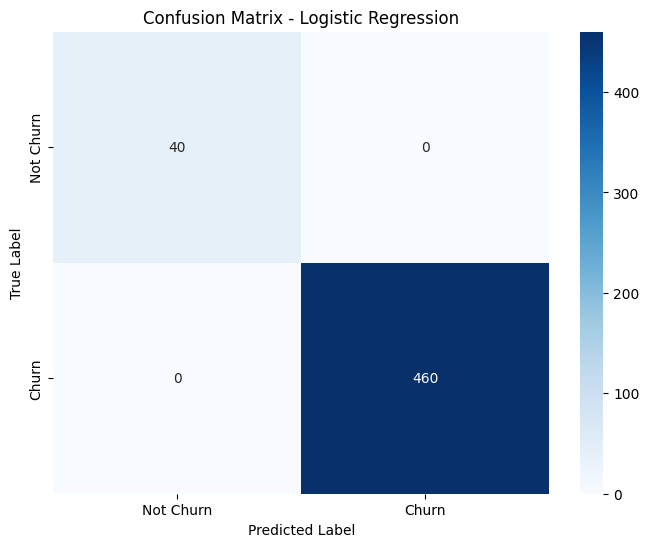

In [ ]:
cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Roc Curve**

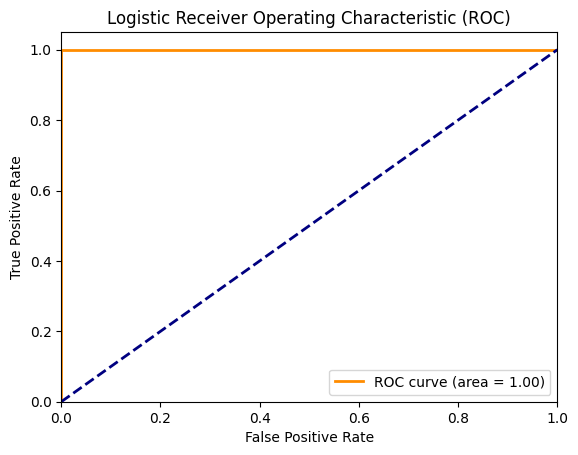

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


**Precision Recall Curve**

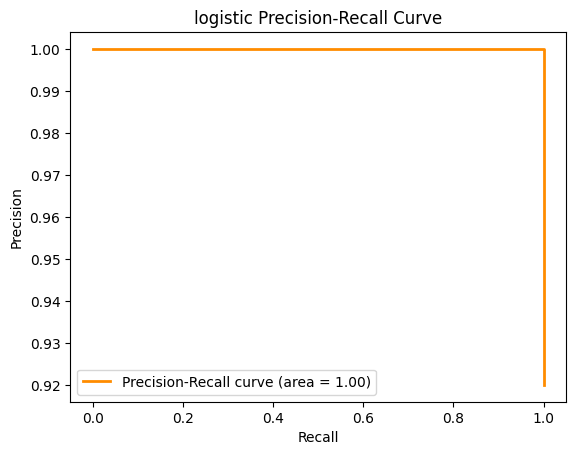

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('logistic Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

**Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       460

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



**Roc Curve**

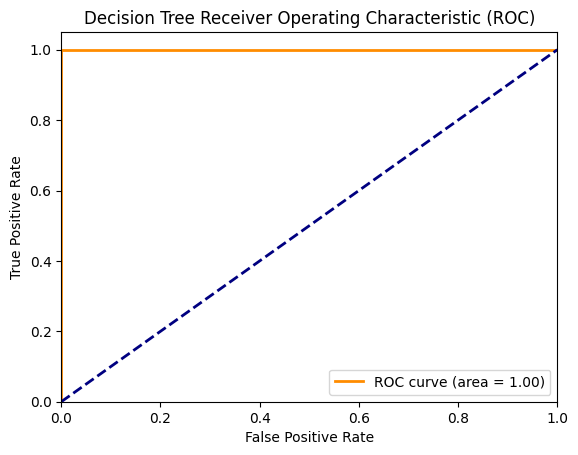

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


**Precision Recall Curve**

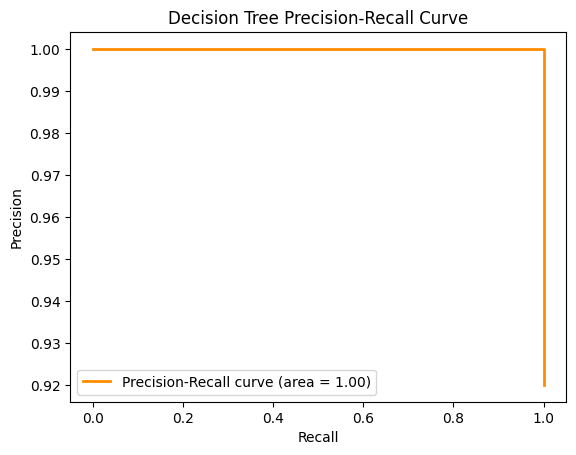

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

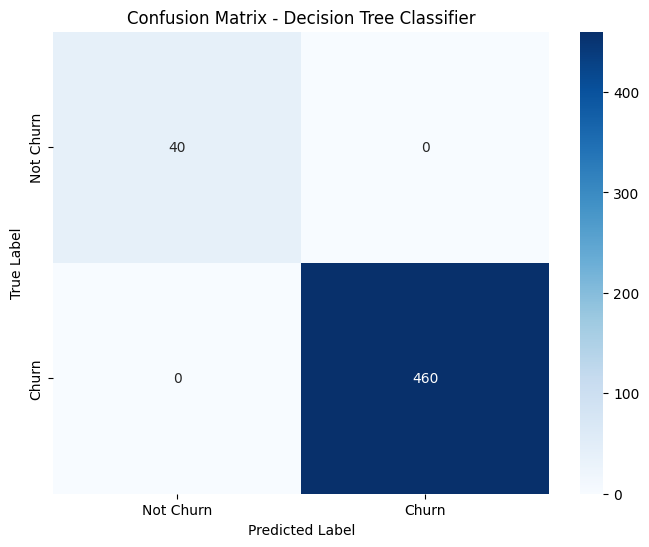

In [ ]:
cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pickle
filename = 'logistic_regression_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))
filename = 'decision_tree_model.sav'
pickle.dump(dt_model, open(filename, 'wb'))
filename = 'label_encoder_model.sav'
pickle.dump(le, open(filename, 'wb'))

In [ ]:
# prompt: save the label encoder

filename = 'label_encoder.sav'
pickle.dump(le, open(filename, 'wb'))
